In [65]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
import pandas as pd


In [82]:
Data = pd.read_csv('C:/Users/HP/Downloads/Folds5x2_pp.csv'); Data


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [71]:
x = np.array(Data.drop(['PE'], axis =1))
y = Data['PE']

## Train Test Split

In [72]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

X_train:(8611, 4)
y_train:(8611,)


## Analytical solutions

In [75]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[-1.67672037 -0.27238545  0.502779   -0.10043602]


## Functions

In [77]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
        return self.__costs, self.__iterations

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

### Batch Gradient Descent

X_train:(8611, 4)
y_train:(8611,)
Iteration: 0, Cost: 1194115.268
Iteration: 1, Cost: 127937410926695.891
Train Score: -31366.112405567532
Test Score:  -29905.248329361362


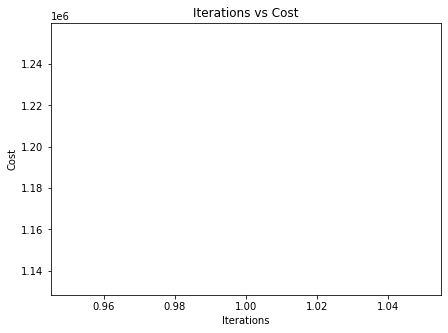

In [78]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False,tol=0.0001)
c,i=batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

## Sequential Gradient Descent

X_train:(8611, 4)
y_train:(8611,)
Iteration: 0, Cost: 777.294
Iteration: 1, Cost: 42.151
Iteration: 2, Cost: 33.337
Iteration: 3, Cost: 32.787
Iteration: 4, Cost: 32.623
Iteration: 5, Cost: 32.491
Iteration: 6, Cost: 32.377
Iteration: 7, Cost: 32.281
Iteration: 8, Cost: 32.200
Iteration: 9, Cost: 32.132
Iteration: 10, Cost: 32.074
Iteration: 11, Cost: 32.026
Iteration: 12, Cost: 31.986
Iteration: 13, Cost: 31.952
Iteration: 14, Cost: 31.923
Iteration: 15, Cost: 31.898
Iteration: 16, Cost: 31.878
Iteration: 17, Cost: 31.860
Iteration: 18, Cost: 31.846
Iteration: 19, Cost: 31.833
Iteration: 20, Cost: 31.822
Iteration: 21, Cost: 31.813
Train Score: 0.8696441271005458
Test Score:  0.8742608327725694


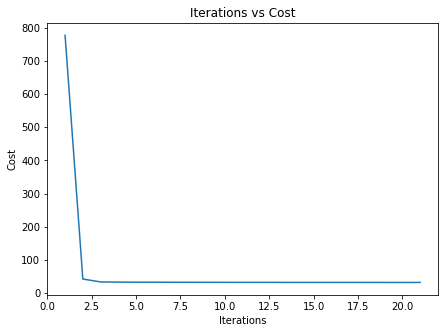

In [79]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

Text(0.5, 1.0, 'Plotting Rh vs PE')

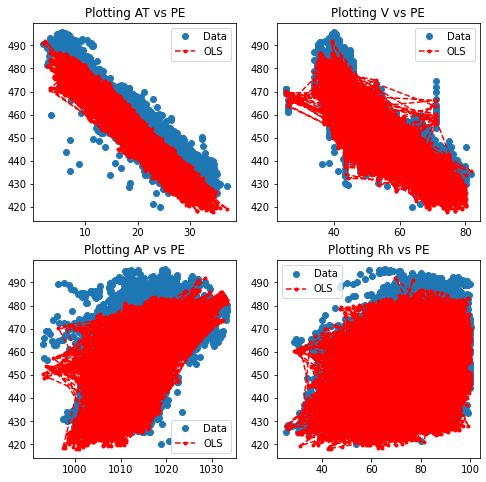

In [113]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].plot( x[:, 0], y, 'o', label="Data")
ax[0, 0].plot(X_train[:, 0], seq_regressor.predict(X_train), "r--.", label="OLS")
ax[0, 0].legend(loc="best")

ax[0, 1].plot( x[:, 1], y, 'o', label="Data")
ax[0, 1].plot(X_train[:, 1], seq_regressor.predict(X_train), "r--.", label="OLS")
ax[0, 1].legend(loc="best")

ax[1, 0].plot( x[:, 2], y, 'o', label="Data")
ax[1, 0].plot(X_train[:, 2], seq_regressor.predict(X_train), "r--.", label="OLS")
ax[1, 0].legend(loc="best")

ax[1, 1].plot( x[:, 3], y, 'o', label="Data")
ax[1, 1].plot(X_train[:, 3], seq_regressor.predict(X_train), "r--.", label="OLS")
ax[1, 1].legend(loc="best")

ax[0, 0].set_title('Plotting AT vs PE')
ax[0, 1].set_title('Plotting V vs PE')
ax[1, 0].set_title('Plotting AP vs PE')
ax[1, 1].set_title('Plotting Rh vs PE')